## Feature Engineering ML Assignment

### 1. Loading Dataset (Iris, Boston)

In [7]:
import pandas as pd
import numpy as np

from sklearn import datasets

iris_data = datasets.load_iris()
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2. Standardization, Normalization, Scaling (Standard scaler, min-max scaler)


In statistics and machine learning, data **standardization** is a process of converting data to z-score values based on the mean and standard deviation of the data.
**Z_i = (x_i - mean(x))/SD(x)**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standardized_data = scaler.fit_transform(df_boston)

print(standardized_data)

[[-0.41978194  0.28482986 -1.2879095  ...  0.44105193 -1.0755623
   0.15968566]
 [-0.41733926 -0.48772236 -0.59338101 ...  0.44105193 -0.49243937
  -0.10152429]
 [-0.41734159 -0.48772236 -0.59338101 ...  0.39642699 -1.2087274
   1.32424667]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  0.44105193 -0.98304761
   0.14880191]
 [-0.40776407 -0.48772236  0.11573841 ...  0.4032249  -0.86530163
  -0.0579893 ]
 [-0.41500016 -0.48772236  0.11573841 ...  0.44105193 -0.66905833
  -1.15724782]]


In [10]:
standardized_df = pd.DataFrame(standardized_data, columns=df_boston.columns)

standardized_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it.
**Normalization** also makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.
The formula for Normalization is 
**x_norm = (x-x_min)/(x_max-x_min)**

In [11]:
from sklearn import preprocessing
d = preprocessing.normalize(df_boston, axis=0)
scaled_df = pd.DataFrame(d, columns=df_boston.columns)
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000030,0.030868,0.007853,0.0,0.042208,0.046222,0.039107,0.041904,0.003442,0.029798,0.036604,0.047927,0.015241,0.043845
1,0.000130,0.000000,0.024035,0.0,0.036795,0.045139,0.047324,0.050890,0.006883,0.024362,0.042585,0.047927,0.027973,0.039461
2,0.000130,0.000000,0.024035,0.0,0.036795,0.050510,0.036648,0.050890,0.006883,0.024362,0.042585,0.047436,0.012334,0.063393
3,0.000154,0.000000,0.007411,0.0,0.035932,0.049196,0.027471,0.062109,0.010325,0.022349,0.044738,0.047653,0.008998,0.061018
4,0.000329,0.000000,0.007411,0.0,0.035932,0.050243,0.032509,0.062109,0.010325,0.022349,0.044738,0.047927,0.016312,0.066133


Using **MinMaxScaler() to Normalize Data** in Python
Sklearn provides another option when it comes to normalizing data: MinMaxScaler.

This is a more popular choice for normalizing datasets.

Here’s the code for normalizing the housing dataset using MinMaxScaler :

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df_boston)

normalized_df = pd.DataFrame(normalized_data, columns=df_boston.columns)

normalized_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


### 3. Label Encoder, Label binarizer, oneHot Encoder

**Label Encoding** refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [13]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])


LabelEncoder()

In [14]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [15]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [16]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

Difference between Label Encoding and One-hot Encoding
1. **Label Encoder:** The categorical values are labeled into numeric values by assigning each category to a number.

   **One-hot Encoding:** A column with categorical values is split into multiple columns.
   
2. **Label Encoder:** Different columns are not added. Rather different categories are converted into numeric values.      So fewer computations.

   **One-hot Encoding:** It will add more columns and will be computationally heavy
   
3. **Label Encoder:** Unique information is there

   **One-hot Encoding:** Redundant information is there
   
4. **Label Encoder:** Different integers are used to represent data

   **One-hot Encoding:** Only 0 and 1 are used to represent data

In [17]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 
'warm', 'hot']
values = array(data)
print("Data:\n ", values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoder:\n" ,integer_encoded)

# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("OneHot Encoder:\n", onehot_encoded)

#Binary encode
lb = LabelBinarizer()
print("Label Binarizer:\n", lb.fit_transform(values))

Data:
  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
Label Encoder:
 [0 0 2 0 1 1 2 0 2 1]
OneHot Encoder:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Label Binarizer:
 [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


### 4. Discretization

**Data discretization** is the process of converting continuous data into discrete buckets by grouping it. Discretization is also known for easy maintainability of the data. Training a model with discrete data becomes faster and more effective than when attempting the same with continuous data. Although continuous-valued data contains more information, huge amounts of data can slow the model down. Here, discretization can help us strike a balance between both. Some famous methods of data discretization are binning and using a histogram. Although data discretization is useful, we need to effectively pick the range of each bucket, which is a challenge. 

The main challenge in discretization is to choose the number of intervals or bins and how to decide on their width.

Here we make use of a function called **pandas.cut()**. This function is useful to achieve the bucketing and sorting of segmented data.

In [18]:
df_boston['binned']=pd.cut(x=df_boston['AGE'], bins=[0,18,36,54,72,100],labels = [0, 1, 2,3,4])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,binned
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3


### 5. Feature Selection

#### 5.1 Removing features with low variance
VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples. 
threshold=(.8 * (1 - .8) means if variance is 0 for 80% of samples then those values will be removed.

In [19]:
from sklearn.feature_selection import VarianceThreshold
#X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
fsel_data = sel.fit_transform(df_boston)
fsel_df = pd.DataFrame(fsel_data)
fsel_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4.0
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3.0
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.0
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3.0


In [20]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,binned
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3


Columns "CHAS", "NOX" removed by variance threshold feature selection as >80% of their samples had variance 0.

### 6. Feature Extraction (LDA, PCA)

#### 6.1 PCA

In [21]:
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
  
# instantiating
cancer = load_breast_cancer()
  
# creating dataframe
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
  
# checking head of dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

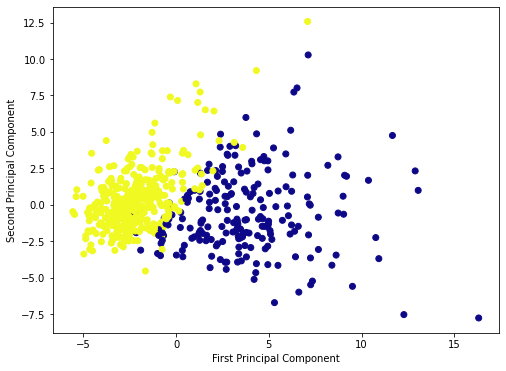

In [23]:
from matplotlib import pyplot as plt
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [24]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

#### 6.2 LDA

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [27]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [28]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.9800000000000001


In [29]:
#define new observation
new = [5, 3, 1, .4]

#predict which class the new observation belongs to
model.predict([new])

array(['setosa'], dtype='<U10')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

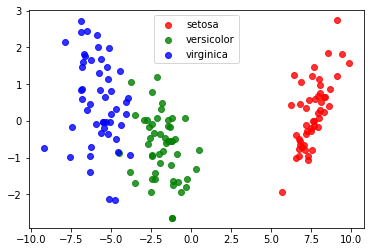

In [30]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

#Graphs

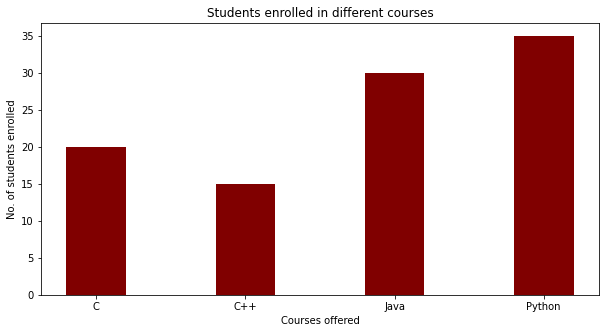

In [31]:
#Bar plot
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
		'Python':35}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()


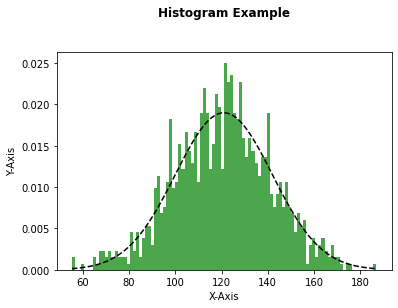

In [32]:
#Histogram
# Implementation of matplotlib function
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10**7)
mu = 121
sigma = 21
x = mu + sigma * np.random.randn(1000)

num_bins = 100

n, bins, patches = plt.hist(x, num_bins,
							density = 1,
							color ='green',
							alpha = 0.7)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
	np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plt.plot(bins, y, '--', color ='black')

plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.title('Histogram Example\n\n',
		fontweight ="bold")

plt.show()


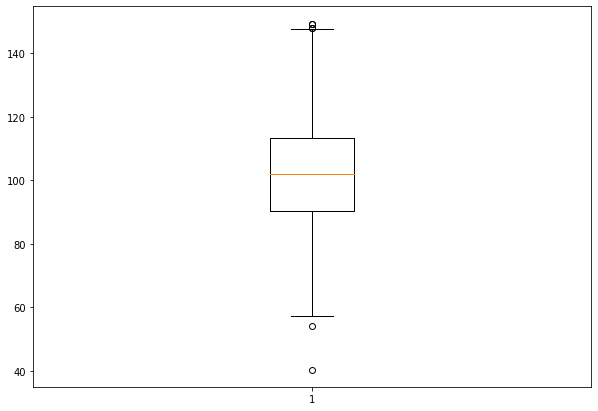

In [33]:
#Box Plot
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)
data = np.random.normal(100, 20, 200)

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()


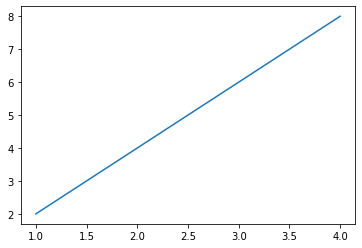

In [34]:
#Line plot
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = np.array([1, 2, 3, 4]) # X-axis points
y = x*2 # Y-axis points

plt.plot(x, y) # Plot the chart
plt.show() # display


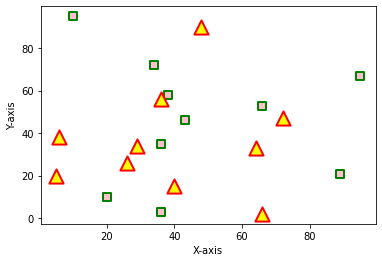

In [35]:
#Scatter plot
import matplotlib.pyplot as plt

# dataset-1
x1 = [89, 43, 36, 36, 95, 10,
	66, 34, 38, 20]

y1 = [21, 46, 3, 35, 67, 95,
	53, 72, 58, 10]

# dataset2
x2 = [26, 29, 48, 64, 6, 5,
	36, 66, 72, 40]

y2 = [26, 34, 90, 33, 38,
	20, 56, 2, 47, 15]

plt.scatter(x1, y1, c ="pink",
			linewidths = 2,
			marker ="s",
			edgecolor ="green",
			s = 50)

plt.scatter(x2, y2, c ="yellow",
			linewidths = 2,
			marker ="^",
			edgecolor ="red",
			s = 200)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
